## Data Cleaning and Preprocessing Notebook

This notebook is to be strictly used for data cleaning and preprocessing purposes. Steps:

1. Read the dataset
2. Handle Missing Values (if any).
3. Do visualizations as required
4. Explore your data here
5. Save the cleaned and processed dataset as `data/final_dataset.csv`.
6. Split the dataset obtained in step 5 as `input/train.csv`,`input/test.csv`,`input/validation.csv`

NO MODELLING WILL BE DONE IN THIS NOTEBOOK!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
print(os.listdir("../data/"))

['dataset-of-00s.csv', 'dataset-of-10s.csv', 'dataset-of-60s.csv', 'dataset-of-70s.csv', 'dataset-of-80s.csv', 'dataset-of-90s.csv', 'README.md']


In [3]:
def read_df_and_add_year(dir_path):
    df=pd.DataFrame()
    for i in os.listdir(dir_path):
        if os.path.splitext(i)[-1]==".csv":
            new=pd.read_csv(os.path.join(dir_path,i))
            filename=os.path.splitext(i)[0]
            filename=filename.split("-")[-1]
            filename=filename[:-1]
            if int(filename)>10:
                new["decade"]=1900+int(filename)
            else:
                new["decade"]=2000+int(filename)
            df=pd.concat([df,new])
    return df

In [4]:
combined=read_df_and_add_year("../data/")

In [5]:
combined.to_csv("../data/combined_music_data.csv",index=False)

c:\Users\Ashwin\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

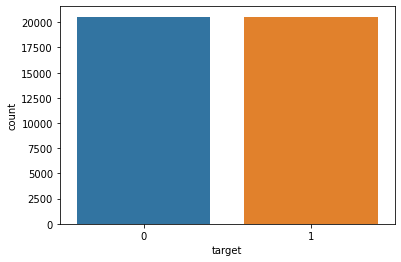

In [6]:
sns.countplot(combined.target)

We thus have a balanced dataset here, with equal representation for both hits and flops. The dataset is large enough (40000 rows) and will be suitable for modelling audio data

In [7]:
combined.isnull().sum()

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
decade              0
dtype: int64

We have no null values either, making this a very useful dataset

In [9]:
combined[combined['target']==1].to_csv("../data/Hit_Songs_Dataset.csv",index=False)
combined[combined['target']==0].to_csv("../data/Flop_Songs_Dataset.csv",index=False)